In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jupyter_black

jupyter_black.load()

In [3]:
import numpy as np

from acoustics.plot import compare, plot
from acoustics.rew import rew_measurements, rew_rt60s

In [4]:
measurements = {}
rt60s = {}
for directory in (
    "2024-04-15_empty",
    "2024-04-16_rug",
    "2024-04-16_curtains",
    "2024-04-16_screen",
    "2024-04-16_couch",
    "2024-04-16_ottoman",
    "2024-04-16_pillows-and-throws",
    "2024-04-24_old-fr",
):
    directory = f"data/{directory}"
    measurements.update(rew_measurements(directory))
    rt60s.update(rew_rt60s(directory))

## Empty room

Room looks something like:

```
   +----------+
   |          |
   |          |
   |          |
 +-+          |
 |            |
 |            |
 |            |
 +------------+

ceil_height 2.524m
front_width 3.704m
back_width 3.968m
left_front_length  2.525m
left_back_length 2.850m
```

Hardwood flooring, lathe & plaster walls & ceiling. Double hung window on the left side of the front wall. Double wide double hung window on the back of the right wall. Unsealed doorway in the center of the back wall and unsealed doorway to a small closest on the right of the back wall.

Unless otherwise noted all measurements are full range and completely untuned: no crossovers, eq, and only minimal level matching for the subs. SPL is roughly calibrated unless otherwise noted.

<img src="../images/media-room-empty.jpg" width=500/>

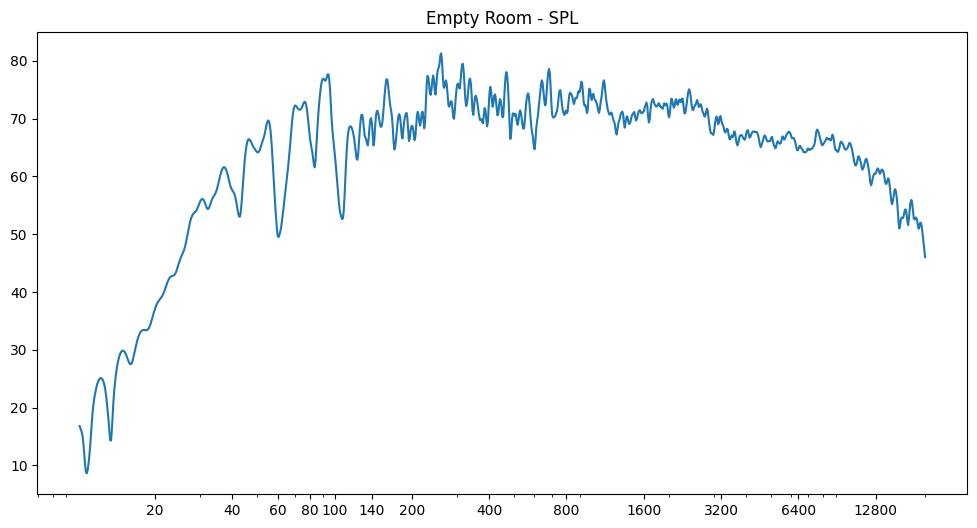

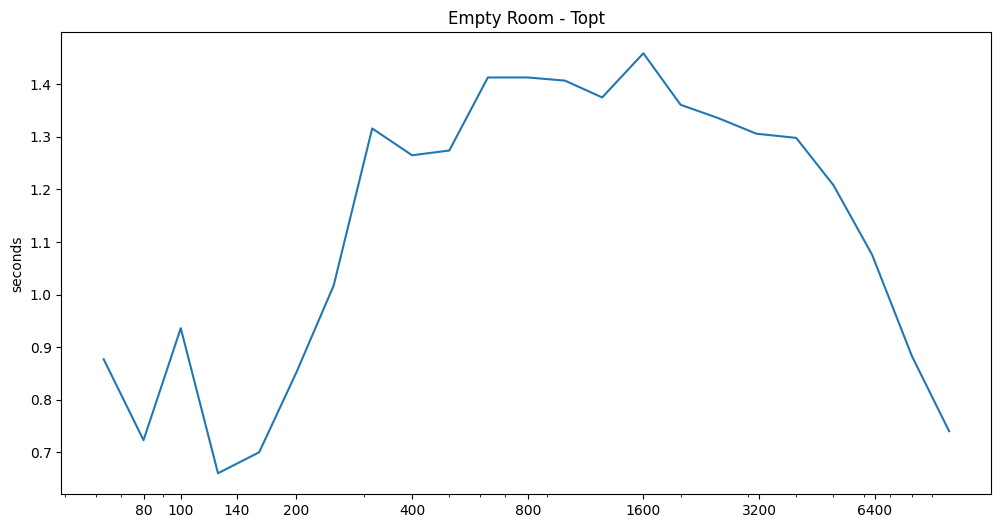

In [5]:
empty = measurements["empty-p1-l"]
ax = plot(
    empty["freq"],
    {
        "empty": empty["spl"],
    },
    "Empty Room - SPL",
    legend=False,
)

empty = rt60s["empty-p1-l"]
ax = plot(
    empty["freq"],
    {
        "empty": empty["topt"],
    },
    "Empty Room - Topt",
    legend=False,
)
ax.set_ylabel("seconds")
None

## Carpeting

Empty room plus a thick pile wool rug and 32oz felt pad covering the majority of the floor, a 5" inset from the baseboard.

The left speaker is a Klipsch RB-61II, a bookshelf so we're skipping over frequencies below where it can reliably operate.

<img src="../images/media-room-rug.jpg" width=500/>

In [6]:
def compare_measurements(a, b, title):
    a_data = measurements[a]
    freq = a_data["freq"]
    skip = len(freq[freq <= 30])
    ax1, ax2 = compare(
        a_data["freq"][skip:], a, a_data["spl"][skip:], b, measurements[b]["spl"][skip:], f"{title} - SPL"
    )

Starts to effect things at 120Hz with around -2db drop, peaks ~450Hz with -6db, and continues up with somwhere around -4db.

This extends a bit lower than expected. May be due to the fairly thick/heavy pile wool and pad.

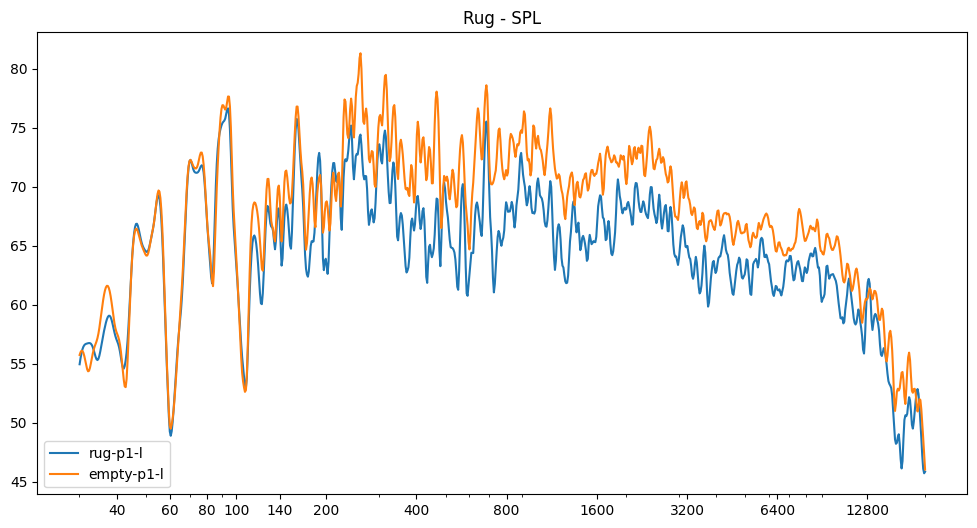

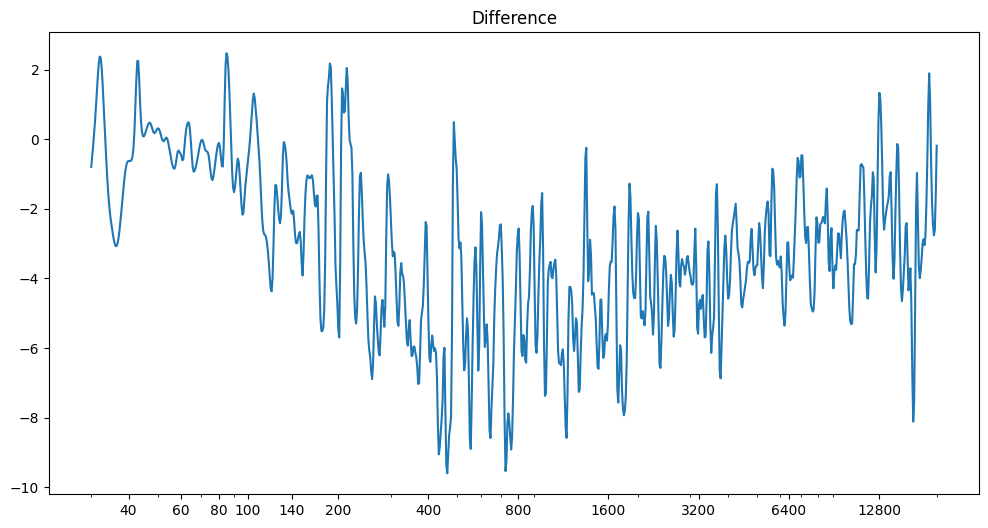

In [7]:
compare_measurements("rug-p1-l", "empty-p1-l", "Rug")

The decay times are much more interesting. The impacted range is the same and for the most part the magnitude follows a similar shape. The rug knocks off around 700ms from roughly 300Hz to 4kHz. 

It's impact falls off sharply below 300Hz. This roughly lines up with what would be expected for ~3/4" thick "absorber" in terms of 1/4 wavelength.

In [8]:
def compare_topts(a, b, title):
    a_data = rt60s[a]def load(filename, threshold=0.25):
    rate, data = read(filename)
    try:
        data = data[:,0]
    except IndexError:
        pass
    data_abs = abs(data)
    data_max = max(data_abs)
    data_abs_norm = data_abs / data_max
    start = np.argmax(data_abs_norm>0.25)
    return rate, data / data_max, start
    ax1, ax2 = compare(a_data["freq"], a, a_data["topt"], b, rt60s[b]["topt"], f"{title} - Topt")
    ax1.set_ylabel("secs")
    ax2.set_ylabel("secs")

SyntaxError: invalid syntax (1756463469.py, line 2)

In [ ]:
compare_topts("rug-p1-l", "empty-p1-l", "Rug")

## Couch

The next thing moved into the room was a moderate sized sectional couch with a chaise section. It's placed about 2/3 of the way back in the room around 5" off the left wall with the front of the chaise portion in the "jut" of the room. The back is around 32" high. It is a fairly soft couch, probably "overstuffed" but not excessively so. 

Interestingly most of the impact here is mostly below 300Hz with maybe a 3db reduction. There appears to be a smaller, maybe 1db, reduction above 300hz, but that maybe a DC offset.

Using the right channel here rather than left as the left appeared to have a 1-2db DC offset. This may be due to moving and replacing the mic, but that wasn't seen in the case of the empty room to carpet transition. Another possibility is that there is now an object in the room very close to the measurement mic locations and the location of the measurement laptop had to move up off the floor, potentially into a location that blocked some reflected sound off the left wall.

In [ ]:
compare_measurements("couch-p1-r", "rug-p1-r", "Couch")

The decay time reductions mostly agree with the SPL changes in terms of frequencies. The 250ms+ drop from 80-200Hz is welcome as porous absorbers will struggle to reach that low. 

Interestingly there's very little reduction at 400Hz, and a modest 150ms above that. 

In [ ]:
compare_topts("couch-p1-r", "rug-p1-r", "Couch")

## Ottoman

A 48" circular ottoman. Slightly padded. Hollow interior.

Fairly small impact to the SPL, most of what is here appears to be below 100Hz. The dip at 140Hz shows up for both the left & center channels. Unclear what it is. There is a bit of a tone when you strike the ottoman, especially on the wooden bottom, so it's possible that it's resonanting at that frequency and acting as an absorver. This warrents further expirimenting.

In [ ]:
compare_measurements("ottoman-p1-l", "couch-p1-l", "Ottoman")

There's a non-negligible drop below about 140Hz here topping out at 100ms. This may add further evidence to the drum-like nature of the ottoman and it acting as an absorber.

In [ ]:
compare_topts("ottoman-p1-l", "couch-p1-l", "Ottoman")

## Pillows and Throws

Previous tests with the couch were using just the cusions. This stage added in a number of throw pillows and blankets that we keep on it.

There's a surprising amount of change from 80-300Hz here. The changes are similar for other channels. My theory here is that adding more objects in close proximity to p1 (primary listening position) caused the outsized response. Going with the right channel again here as it was slightly less noisy

In [ ]:
compare_measurements("pillows-and-throws-p1-r", "ottoman-p1-r", "Pillows and Throws")

There's some change here, but I suspect it's just noise, perhaps showing the limits of the bookshelves ability to reliable reproduce low frequencies. When comparing the front right sub measurement there's no real change.

In [ ]:
compare_topts("pillows-and-throws-p1-r", "ottoman-p1-r", "Pillows and Throws")
compare_topts("pillows-and-throws-p1-sfr", "ottoman-p1-sfr", "Pillows and Throws - Sub")

## Curtains

Double layer of medium weight Ikea curtains, mostly straight, over the right side two windows.

Very little impact to SPL

In [ ]:
compare_measurements("curtains-p1-l", "pillows-and-throws-p1-r", "Curtains")

Perhaps a bit of impact to the decay times. Both left & front right sub shown. Using the left above 140Hz there's around a 50ms drop starting at 200Hz. Switching to the sub for everything below 140Hz there's no change.

In [ ]:
compare_topts("curtains-p1-l", "pillows-and-throws-p1-r", "Curtains")
compare_topts("curtains-p1-sfr", "pillows-and-throws-p1-sfr", "Curtains - Sub")

## Screen

135" Elite Screens Starling 2 on the front wall. Hangs around 2 3/4" off the wall. Covers the window on the front wall. There's also an inexpensive roller shade covering this window now.

This is the final measurement of the fully furnished room. It will be the starting point for future work with treatemtns.

Bit of impact to SPL between 300-900Hz. 

<img src="../images/media-room-screen.jpg" width=500/>

In [ ]:
compare_measurements("screen-p1-l", "curtains-p1-l", "Screen")

Similiar picture for decay times. Flattening things out a bit from 300-3kHz.

In [ ]:
compare_topts("screen-p1-l", "curtains-p1-l", "Screen")